# 8장. 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#### - 아나콘다에 nltk 가 기본으로 설치되어있으므로, pip으로 설치할 필요없음.
####    하지만, 최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [2]:
import nltk     # nltk.download() 를 하기위해, import 함.

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 책에 있는 결과 화면과 다를수 있습니다.☺ -

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
fpath = '/content/drive/MyDrive/teaching/2025-1_social/week6/'
all_files = glob.glob(fpath + 'data/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (9).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (5).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (7).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (3).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (6).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData.xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (8).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (2).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (1).xls',
 '/content/drive/MyDrive/teaching/2025-1_social/week6/data/myCabinetExcelData (4).xls']

In [5]:
all_files_data = [] #저장할 리스트

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clinical Trial Data as Public Goods: Fair Trad...,"Evangelatos, Nikolaos; Reumann, Matthias; Lehr...",S.Karger A.G.,2016
1,NaN,2,Seeing the Big Picture Lensless cameras and ot...,"Greengard, S.",ACM ASSOCIATION FOR COMPUTING MACHINERY,2013
2,NaN,3,These Are Big Days For Big Data,unknown,RODMAN PUBLISHING CORP,2014
3,NaN,4,"Secure Dynamic Big Graph Data: Scalable, Low-C...","Lu, Yu",IEEE,2019
4,NaN,5,Pitfalls in big data analysis: next-generation...,"Lau, Susanna K.P.; Woo, Patrick C.Y.","Elsevier Science B.V., Amsterdam.",2019
...,...,...,...,...,...,...
95,NaN,96,Layered software patterns for data analysis in...,"Hakeem, H.",Springer Science + Business Media,2017
96,NaN,97,"GPU-DAEMON: GPU algorithm design, data managem...","Awan, Muaaz Gul; Eslami, Taban; Saeed, Fahad","Elsevier Science B.V., Amsterdam.",2018
97,NaN,98,U.S. Government BETS Big on Data: A multi-agen...,"Seffers, G.I.",AFCEA ARMED FORCES COMMUNICATIONS AND,2013
98,NaN,99,Tuning small analytics on Big Data: Data parti...,"Romero, Oscar; Herrero, Victor; Abelló, Albert...","Elsevier Science B.V., Amsterdam.",2015


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Clinical Trial Data as Public Goods: Fair Trad...,"Evangelatos, Nikolaos; Reumann, Matthias; Lehr...",S.Karger A.G.,2016
1,NaN,2,Seeing the Big Picture Lensless cameras and ot...,"Greengard, S.",ACM ASSOCIATION FOR COMPUTING MACHINERY,2013
2,NaN,3,These Are Big Days For Big Data,unknown,RODMAN PUBLISHING CORP,2014
3,NaN,4,"Secure Dynamic Big Graph Data: Scalable, Low-C...","Lu, Yu",IEEE,2019
4,NaN,5,Pitfalls in big data analysis: next-generation...,"Lau, Susanna K.P.; Woo, Patrick C.Y.","Elsevier Science B.V., Amsterdam.",2019
...,...,...,...,...,...,...
995,NaN,96,Big data analytics sentiment: US-China reactio...,"LaBrie, Ryan C.; Steinke, Gerhard H.; Li, Xian...","Elsevier Science B.V., Amsterdam.",2018
996,NaN,97,Big Data In the first of three articles on Big...,unknown,FENMAN LTD,2014
997,NaN,98,Big data driven lithium-ion battery modeling m...,"Li, Shuangqi; He, Hongwen; Li, Jianwei","Elsevier Science B.V., Amsterdam.",2019
998,NaN,99,Big data in multiple sclerosis: development of...,unknown,The Society,2015


In [7]:
all_files_data_concat.to_csv(fpath + 'data/riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [8]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

,제목
0,Clinical Trial Data as Public Goods: Fair Trad...
1,Seeing the Big Picture Lensless cameras and ot...
2,These Are Big Days For Big Data
3,"Secure Dynamic Big Graph Data: Scalable, Low-C..."
4,Pitfalls in big data analysis: next-generation...
...,...
995,Big data analytics sentiment: US-China reactio...
996,Big Data In the first of three articles on Big...
997,Big data driven lithium-ion battery modeling m...
998,Big data in multiple sclerosis: development of...


In [9]:
nltk.download('stopwords')
nltk.download('punkt_tab')
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
words = []
nltk.download('punkt')
nltk.download('wordnet')

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
print(words)  #출력하여 내용 확인

[['clinical', 'trial', 'data', 'public', 'good', 'fair', 'trade', 'virtual', 'knowledge', 'bank', 'solution', 'free', 'rider', 'problem', 'framework', 'promotion', 'innovation', 'facilitation', 'clinical', 'trial', 'data', 'sharing', 'among', 'biopharmaceutical', 'company', 'era', 'omics', 'big', 'data'], ['seeing', 'big', 'picture', 'lensless', 'camera', 'advance', 'digital', 'imaging', 'computational', 'optic', 'signal', 'processing', 'big', 'data', 'transforming', 'think', 'photography'], ['big', 'day', 'big', 'data'], ['secure', 'dynamic', 'big', 'graph', 'data', 'scalable', 'low', 'cost', 'remote', 'data', 'integrity', 'checking'], ['pitfall', 'big', 'data', 'analysis', 'next', 'generation', 'technology', 'last', 'generation', 'data'], ['toward', 'big', 'data', 'approach', 'indexing', 'encrypted', 'data', 'cloud', 'computing'], ['making', 'data', 'connection', 'big', 'gap', 'remain', 'sharing', 'data', 'retail', 'clinic', 'health', 'system'], ['mapping', 'data', 'shadow', 'hurrica

In [12]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['clinical', 'trial', 'data', 'public', 'good', 'fair', 'trade', 'virtual', 'knowledge', 'bank', 'solution', 'free', 'rider', 'problem', 'framework', 'promotion', 'innovation', 'facilitation', 'clinical', 'trial', 'data', 'sharing', 'among', 'biopharmaceutical', 'company', 'era', 'omics', 'big', 'data', 'seeing', 'big', 'picture', 'lensless', 'camera', 'advance', 'digital', 'imaging', 'computational', 'optic', 'signal', 'processing', 'big', 'data', 'transforming', 'think', 'photography', 'big', 'day', 'big', 'data', 'secure', 'dynamic', 'big', 'graph', 'data', 'scalable', 'low', 'cost', 'remote', 'data', 'integrity', 'checking', 'pitfall', 'big', 'data', 'analysis', 'next', 'generation', 'technology', 'last', 'generation', 'data', 'toward', 'big', 'data', 'approach', 'indexing', 'encrypted', 'data', 'cloud', 'computing', 'making', 'data', 'connection', 'big', 'gap', 'remain', 'sharing', 'data', 'retail', 'clinic', 'health', 'system', 'mapping', 'data', 'shadow', 'hurricane', 'sandy', '

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [13]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'clinical': 10,
         'trial': 4,
         'data': 1645,
         'public': 11,
         'good': 7,
         'fair': 2,
         'trade': 1,
         'virtual': 3,
         'knowledge': 22,
         'bank': 4,
         'solution': 13,
         'free': 1,
         'rider': 1,
         'problem': 13,
         'framework': 26,
         'promotion': 1,
         'innovation': 9,
         'facilitation': 1,
         'sharing': 14,
         'among': 4,
         'biopharmaceutical': 1,
         'company': 15,
         'era': 22,
         'omics': 2,
         'big': 1354,
         'seeing': 1,
         'picture': 13,
         'lensless': 1,
         'camera': 3,
         'advance': 5,
         'digital': 10,
         'imaging': 5,
         'computational': 5,
         'optic': 2,
         'signal': 3,
         'processing': 30,
         'transforming': 4,
         'think': 2,
         'photography': 1,
         'day': 3,
         'secure': 2,
         'dynamic': 7,
         'graph':

In [14]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
research : 38
new : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
social : 24
driven : 24
issue : 24
deal : 23
network : 23
quality : 23
knowledge : 22
era : 22
efficient : 22
review : 22
use : 22
storage : 21
service : 21
healthcare : 21
perspective : 21
open : 20
making : 19
platform : 19
survey : 19
process : 19
market : 18
method : 18
environment : 18


#### 여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [15]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

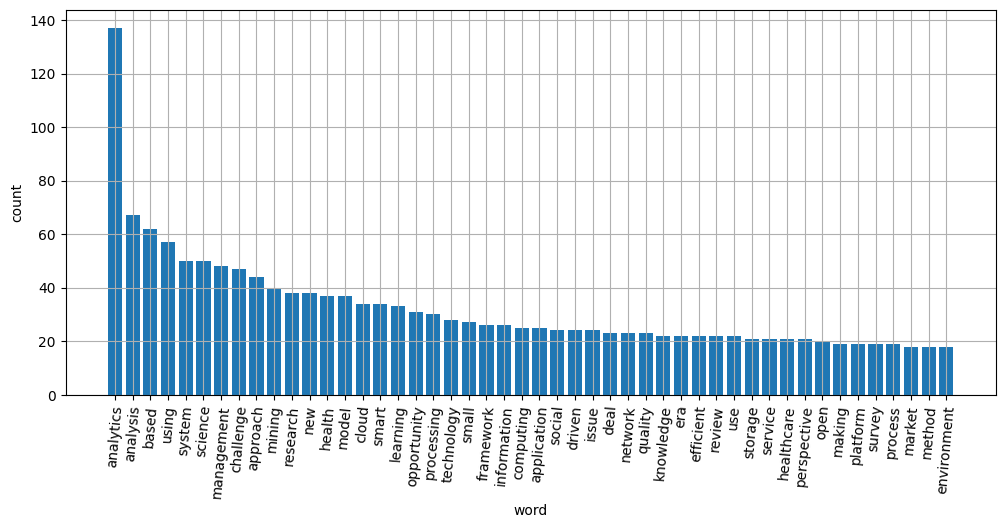

In [16]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [17]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


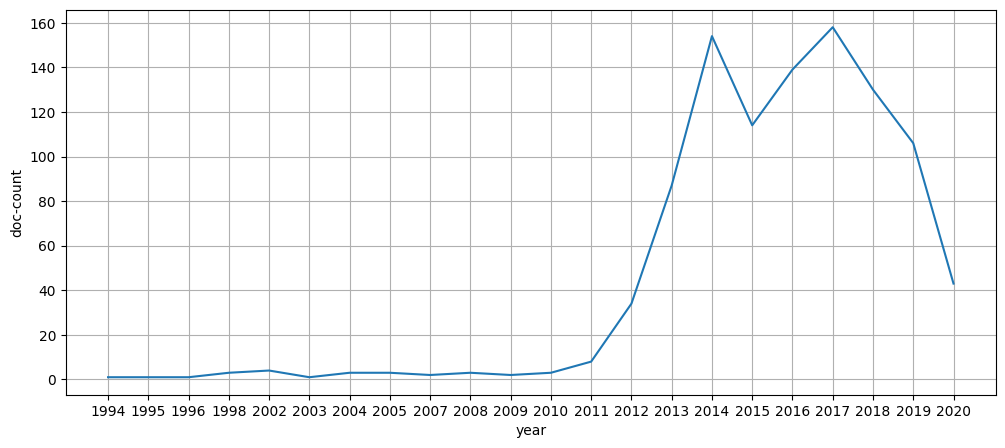

In [18]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

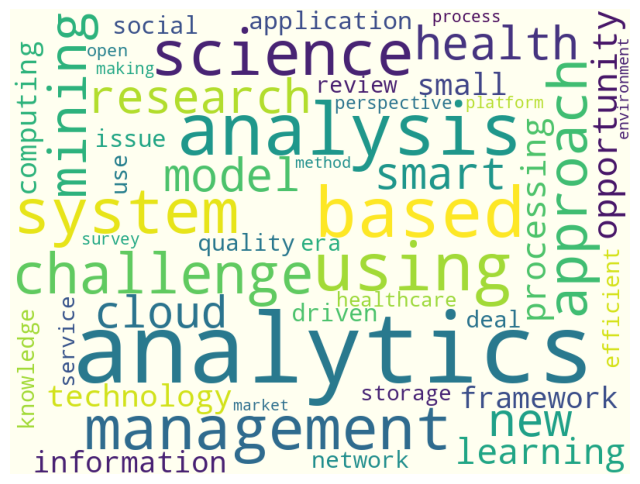

In [19]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [20]:
cloud.to_file(fpath + "data/riss_bigdata_wordCloud.jpg")

# 8장. 텍스트 빈도 분석 (2)한글단어분석

## 4. 데이터 준비

## 한글 단어 분석을 위한 패키지 준비

In [21]:
!pip install konlpy

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [24]:
fpath = '/content/drive/MyDrive/teaching/2025-1_social/week6/'
inputFileName = fpath + 'data/아시안컵_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '<b>아시안컵</b> 조별 및 토너먼트 경기 분석 ▲ 페널티킥 성공시킨 손흥민 손흥민이 25일(현지시간) 카타르 알와크라 알자누브 스타디움 열린 2023 아시아축구연맹(AFC) <b>아시안컵</b> 조별리그 E조 최종전 한국과 말레이시아의... ',
  'link': 'https://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002999660&CMPT_CD=P0010&utm_source=naver&utm_medium=newsearch&utm_campaign=naver_news',
  'org_link': 'https://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002999660&CMPT_CD=P0010&utm_source=naver&utm_medium=newsearch&utm_campaign=naver_news',
  'pDate': '2024-02-04 11:41:00',
  'title': "전세계 놀라게 한 '코리안타임'... 핵심은 중꺾마였다"},
 {'cnt': 2,
  'description': '일본은 3일 오후 8시 30분(한국시간) 카타르 알라이얀에 위치한 에듀케이션 시티 스타디움에서 열린 2023 아시아축구연맹(AFC) 카타르 <b>아시안컵</b> 8강전에서 이란에 1-2로 패배했다. 이날 경기 패배로 일본의 <b>아시안컵</b> 여정은... ',
  'link': 'https://www.fourfourtwo.co.kr/news/articleView.html?idxno=48179',
  'org_link': 'https://www.fourfourtwo.co.kr/news/articleView.html?idxno=48179',
  'pDate': '2024-02-04 11:41:00',
  'title': "'SNS 테러'는 만국 공통인가...日 축구팬, '극장 PK' 내준 DF 향해 악플 세례

In [25]:
description = ''
for item in data:
    if 'description' in item.keys():
        description = description + re.sub(r'[^\w]', ' ', item['description']) +''

description #출력하여 내용 확인

' b 아시안컵  b  조별 및 토너먼트 경기 분석   페널티킥 성공시킨 손흥민 손흥민이 25일 현지시간  카타르 알와크라 알자누브 스타디움 열린 2023 아시아축구연맹 AFC   b 아시안컵  b  조별리그 E조 최종전 한국과 말레이시아의    일본은 3일 오후 8시 30분 한국시간  카타르 알라이얀에 위치한 에듀케이션 시티 스타디움에서 열린 2023 아시아축구연맹 AFC  카타르  b 아시안컵  b  8강전에서 이란에 1 2로 패배했다  이날 경기 패배로 일본의  b 아시안컵  b  여정은    2023 카타르  b 아시안컵  b  4강에서 한국과 맞붙을 요르단이 벌써부터 축제 분위기다  요르단 통신사  페트라 는 3일 한국시간  요르단 대표팀이  b 아시안컵  b  4강 진출을 달성해 이미 100만 달러 약 13억 원  포상금을 확보했다고    모리야스 하지메 감독이 이끄는 일본 대표팀은 3일 한국시각  카타르 알라이얀의 에듀케이션 시티 스타디움에서 열린 이란과의 카타르 b 아시안컵  b  8강전에서 1대2로 충격 역전패했다  먼저 앞서 나간 팀은 일본이었다  전반    일본 축구대표팀이 카타르  b 아시안컵  b  8강에서 이란에 패하면서 4강 진출에 실패한 가운데  일본 대표팀 에이스 쿠보 다케후사가 동갑내기 절친 이강인에게 건넨 말이 눈길을 끈다 쿠보는 이란전을 마친 후 믹스트존에서    앞서 이란과 일본은 지난 3일 오후 8시 30분 카타르 알 라이얀의 에듀케이션 스타디움에서  2023 아시아축구연맹 AFC  카타르  b 아시안컵  b  8강에서 만났다  두 팀 역시 이번  b 아시안컵  b 에서 강력한 우승 후보로 꼽혔다      디펜딩 챔피언  카타르가 우즈베키스탄을 꺾고 4강행을 확정함에 따라 2023 카타르  b 아시안컵  b 의 준결승     b 아시안컵  b  준결승에 진출한 건 이번이 처음이다  8강전에선 이번 대회 돌풍의 주역이었던 타지키스탄과 다퉜는데    지난 3일 카타르 알와크라의 알자누브 스타디움에서 열린  2023 아시아축구

In [26]:
nlp = Okt()
description_N = nlp.nouns(description)
description_N #출력하여 내용 확인

['아시안컵',
 '별',
 '및',
 '토너먼트',
 '경기',
 '분석',
 '페널티킥',
 '성공',
 '손흥민',
 '손흥민',
 '현지',
 '시간',
 '카타르',
 '알와크라',
 '알자누브',
 '스타디움',
 '아시아',
 '축구',
 '연맹',
 '아시안컵',
 '리그',
 '조',
 '최종',
 '전',
 '한국',
 '말레이시아',
 '일본',
 '오후',
 '한국',
 '시간',
 '카타르',
 '알라',
 '얀',
 '위치',
 '에듀',
 '케이',
 '션',
 '시티',
 '스타디움',
 '아시아',
 '축구',
 '연맹',
 '카타르',
 '아시안컵',
 '강전',
 '이란',
 '로',
 '날',
 '경기',
 '패배',
 '일본',
 '아시안컵',
 '여정',
 '카타르',
 '아시안컵',
 '강',
 '한국',
 '요르단',
 '벌써',
 '축제',
 '분위기',
 '요르단',
 '통신사',
 '페트라',
 '한국',
 '시간',
 '요르단',
 '대표팀',
 '아시안컵',
 '강',
 '진출',
 '달성',
 '달러',
 '약',
 '원',
 '포',
 '상금',
 '확보',
 '모리',
 '야스',
 '메',
 '감독',
 '일본',
 '대표팀',
 '한국',
 '시각',
 '카타르',
 '알라',
 '얀',
 '에듀',
 '케이',
 '션',
 '시티',
 '스타디움',
 '이란',
 '카타르',
 '아시안컵',
 '강전',
 '로',
 '충격',
 '역전패',
 '먼저',
 '앞서',
 '팀',
 '일본',
 '전반',
 '일본',
 '축구',
 '대표팀',
 '카타르',
 '아시안컵',
 '강',
 '이란',
 '패',
 '강',
 '진출',
 '가운데',
 '일본',
 '대표팀',
 '에이스',
 '쿠보',
 '다케후사',
 '동갑',
 '내기',
 '절친',
 '이강인',
 '말',
 '눈길',
 '쿠보',
 '이란',
 '전',
 '후',
 '믹스트존',
 '앞서',
 '이란',
 '일본',
 '지난',
 '오

##  5. 데이터 탐색 및 분석 모델 구축

In [27]:
count = Counter(description_N)
count #출력하여 내용 확인

Counter({'아시안컵': 1300,
         '별': 1,
         '및': 2,
         '토너먼트': 10,
         '경기': 617,
         '분석': 13,
         '페널티킥': 53,
         '성공': 17,
         '손흥민': 54,
         '현지': 476,
         '시간': 749,
         '카타르': 1446,
         '알와크라': 26,
         '알자누브': 11,
         '스타디움': 742,
         '아시아': 751,
         '축구': 906,
         '연맹': 753,
         '리그': 28,
         '조': 5,
         '최종': 2,
         '전': 50,
         '한국': 389,
         '말레이시아': 4,
         '일본': 1242,
         '오후': 154,
         '알라': 599,
         '얀': 666,
         '위치': 33,
         '에듀': 675,
         '케이': 675,
         '션': 675,
         '시티': 658,
         '강전': 815,
         '이란': 1161,
         '로': 266,
         '날': 31,
         '패배': 16,
         '여정': 15,
         '강': 415,
         '요르단': 55,
         '벌써': 1,
         '축제': 2,
         '분위기': 4,
         '통신사': 1,
         '페트라': 1,
         '대표팀': 107,
         '진출': 170,
         '달성': 3,
         '달러': 1,
         '약': 4,
   

In [28]:
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

카타르 : 1446
아시안컵 : 1300
일본 : 1242
이란 : 1161
축구 : 906
강전 : 815
연맹 : 753
아시아 : 751
시간 : 749
스타디움 : 742
에듀 : 675
케이 : 675
시티 : 658
경기 : 617
알라 : 599
현지 : 476
한국 : 389
진출 : 170
오후 : 154
감독 : 147
우승 : 134
후반 : 123
역전패 : 120
기자 : 115
탈락 : 111
뉴스 : 110
대표팀 : 107
전반 : 101
야스 : 98
선수 : 97
김성진 : 97
모리 : 96
호주 : 90
히데 : 86
이하 : 86
마사 : 76
후보 : 70
리타 : 69
추가 : 67
대회 : 65
라이 : 64
바크 : 62
헤비 : 59
역전승 : 58
클린스만 : 58
선제골 : 56
요르단 : 55
승리 : 55
손흥민 : 54
페널티킥 : 53
동점골 : 52
미토 : 52
이번 : 51
우즈베키스탄 : 51
준결승 : 44
시가 : 44
시각 : 43
선수단 : 43
대한민국 : 39
지난 : 38
시도 : 38
대결 : 37
역전 : 37
국가대표팀 : 36
랭킹 : 36
중동 : 35
위르겐 : 34
위치 : 33
승부차기 : 33
결승 : 31
쿠라 : 29
선취골 : 29
리그 : 28
연장 : 28
토트넘 : 27
도하 : 27
환호 : 27
구보 : 27


In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [30]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [31]:
# font_path = "c:/Windows/fonts/malgun.ttf"
# font_name = font_manager.FontProperties( fname = font_path).get_name()
# matplotlib.rc('font', family = font_name)

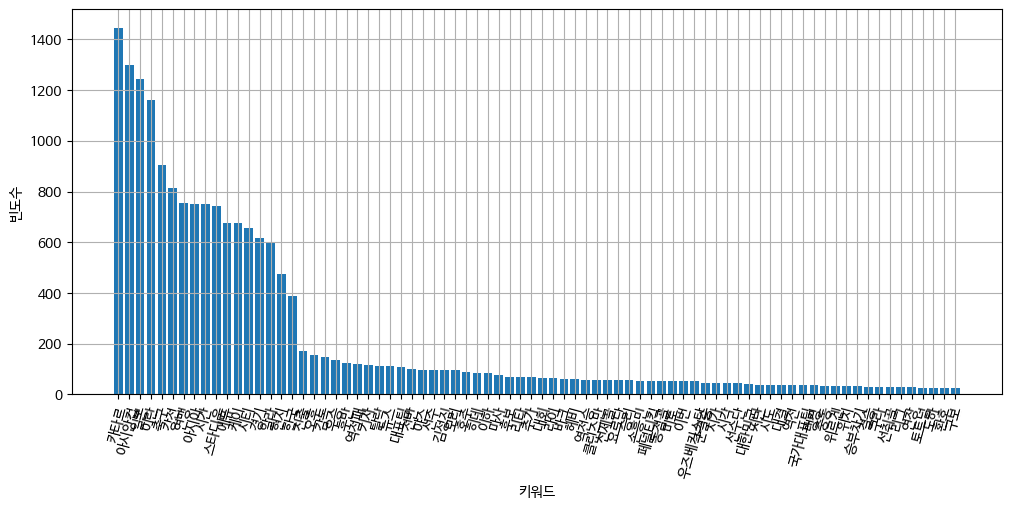

In [32]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

## 6. 결과 시각화

In [33]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

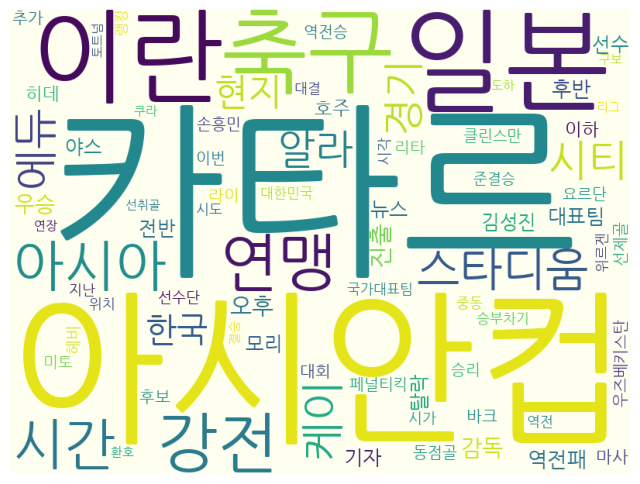

In [34]:
wc = WordCloud( font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [35]:
cloud.to_file(inputFileName + '_cloud.jpg')